In [2]:
import xgboost as xgb

In [5]:
!wget https://github.com/ameerhamza-bkz/google-derm-foundation-api/raw/refs/heads/main/xgb_onevsAll_9_conditions_SCIN_Fitz_v.txt

--2025-06-25 05:29:47--  https://github.com/ameerhamza-bkz/google-derm-foundation-api/raw/refs/heads/main/xgb_onevsAll_9_conditions_SCIN_Fitz_v.txt
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ameerhamza-bkz/google-derm-foundation-api/refs/heads/main/xgb_onevsAll_9_conditions_SCIN_Fitz_v.txt [following]
--2025-06-25 05:29:47--  https://raw.githubusercontent.com/ameerhamza-bkz/google-derm-foundation-api/refs/heads/main/xgb_onevsAll_9_conditions_SCIN_Fitz_v.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 768417 (750K) [application/octet-stream]
Saving to: ‘xgb_onevsAll_9_conditions_SCIN_Fit

In [16]:
import joblib
model = joblib.load('/kaggle/working/xgb_onevsAll_9_conditions_SCIN_Fitz_v.txt')

In [ ]:
# Download test image.
from PIL import Image
from io import BytesIO
from IPython.display import Image as IPImage, display
from huggingface_hub import from_pretrained_keras
import tensorflow as tf

# Download sample image
!wget -nc -q https://storage.googleapis.com/dx-scin-public-data/dataset/images/3445096909671059178.png

# Load the image
img = Image.open("3445096909671059178.png")
buf = BytesIO()
img.convert('RGB').save(buf, 'PNG')
image_bytes = buf.getvalue()

# Format input
input_tensor= tf.train.Example(features=tf.train.Features(
        feature={'image/encoded': tf.train.Feature(
            bytes_list=tf.train.BytesList(value=[image_bytes]))
        })).SerializeToString()

# Load the model directly from Hugging Face Hub
loaded_model = from_pretrained_keras("google/derm-foundation")

# Call inference
infer = loaded_model.signatures["serving_default"]
output = infer(inputs=tf.constant([input_tensor]))

# Extract the embedding vector
embedding_vector = output['embedding'].numpy().flatten()


In [4]:
import joblib
import os
import urllib
MODEL_URL = "https://github.com/ameerhamza-bkz/google-derm-foundation-api/raw/refs/heads/main/xgb_onevsAll_9_conditions_SCIN_Fitz_v.txt"
MODEL_PATH = "xgb_model.txt"

# Download only if not already present
if not os.path.exists(MODEL_PATH):
    urllib.request.urlretrieve(MODEL_URL, MODEL_PATH)

# Load the model
xgb_model = joblib.load(MODEL_PATH)
print(xgb_model)

OneVsRestClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.95, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='logloss',
                                            feature_types=None, gamma=0,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.5, max_bin=None,
                                            max_cat_threshold=None,
                     

In [6]:
from huggingface_hub.utils import HfFolder
from huggingface_hub import notebook_login

if HfFolder.get_token() is None:
    from huggingface_hub import notebook_login
    notebook_login()

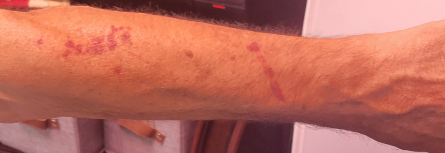

In [9]:
from PIL import Image
from io import BytesIO
from IPython.display import Image as IPImage, display

# Download sample image
!wget -nc -q https://storage.googleapis.com/dx-scin-public-data/dataset/images/3445096909671059178.png

# Load the image, process, and directly display it
img = Image.open("3445096909671059178.png")
# img = Image.open('/content/test_image.jpg')
buf = BytesIO()
img.convert('RGB').save(buf, 'PNG')
image_bytes = buf.getvalue()
display(IPImage(data=buf.getvalue()))

In [11]:
from huggingface_hub import snapshot_download, login
from keras.layers import TFSMLayer
import tensorflow as tf
import os

# Authenticate (if using a gated model)
# login(token=os.environ["HF_TOKEN"])  # optional, only if model is private

input_tensor= tf.train.Example(features=tf.train.Features(
        feature={'image/encoded': tf.train.Feature(
            bytes_list=tf.train.BytesList(value=[image_bytes]))
        })).SerializeToString()

# Download the model locally
model_path = snapshot_download("google/derm-foundation")

# Load SavedModel as TFSMLayer (Keras 3 compatible)
model = TFSMLayer(model_path, call_endpoint="serving_default")  # update endpoint if needed

# Prepare your serialized tf.train.Example
output = model(inputs=tf.constant([input_tensor]))

# Inference
# output = model(input_tensor)
embedding_vector = output["embedding"].numpy().flatten()


Fetching 7 files:   0%|          | 0/7 [00:00<?, ?it/s]

I0000 00:00:1750841968.256260     117 service.cc:148] XLA service 0x7df96800bd40 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1750841968.260473     117 service.cc:156]   StreamExecutor device (0): Host, Default Version
I0000 00:00:1750841977.536437     117 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


In [12]:
print(embedding_vector)

[0.01385013 0.         0.02349676 ... 0.         0.         0.1823188 ]


In [13]:
import keras
print(keras.__version__)

3.8.0


In [2]:
!pip install gradio_client

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.6/323.6 kB 5.6 MB/s eta 0:00:00a 0:00:01


In [3]:
from gradio_client import Client, handle_file

client = Client("ameerhmz/derm-foundation")
result = client.predict(
		image=handle_file('https://raw.githubusercontent.com/gradio-app/gradio/main/test/test_files/bus.png'),
		api_name="/predict_skin_condition"
)
print(result)

Loaded as API: https://ameerhmz-derm-foundation.hf.space ✔
('[]', {'label': 'Actinic Keratosis', 'confidences': [{'label': 'Actinic Keratosis', 'confidence': 0.0006353150238282979}, {'label': 'Bullous Disease', 'confidence': 0.00028412489336915314}, {'label': 'Tinea', 'confidence': 0.00025714345974847674}, {'label': 'Atopic Dermatitis', 'confidence': 0.00011290617840131745}, {'label': 'Urticaria', 'confidence': 8.855335909174755e-05}, {'label': 'Cellulitis', 'confidence': 4.698597695096396e-05}, {'label': 'Psoriasis', 'confidence': 3.457775528659113e-05}, {'label': 'Eczema', 'confidence': 1.4092077435634565e-05}, {'label': 'Acne', 'confidence': 1.1948541214223951e-05}]})
